In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Deep Neural Network Analysis & Prediction Approach

### Load Data

In [5]:
data = pd.read_csv('organized_twitch_data.csv')

In [6]:
data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,Chinese,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Followers gained'>

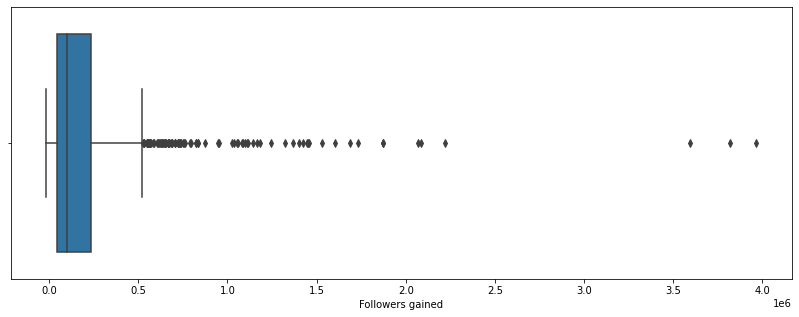

In [7]:
figure, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(ax=ax, x=data['Followers gained'])

### Remove Outliers

In [8]:
Q1 = data['Followers gained'].quantile(0.25)
Q3 = data['Followers gained'].quantile(0.75)

In [9]:
IQR = Q3-Q1
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

In [10]:
outlier_filter = (data['Followers gained'] >= lower_limit) & (data['Followers gained'] <= upper_limit)

In [11]:
no_outliers = data.loc[outlier_filter]

In [12]:
len(no_outliers)

910

In [13]:
no_outliers = no_outliers.reset_index().drop('index', axis=1)

In [14]:
no_outliers.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,Chinese,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,3301867485,147885,68795,18985,508816,425468,670137548,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2832930285,128490,89170,21739,2666382,199077,50504526,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2674646715,80820,639375,20960,4487489,497678,56855694,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2329440420,115305,107833,19659,2786162,236169,39334821,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2186662470,181230,26999,12201,494445,92205,34405975,1,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Followers gained'>

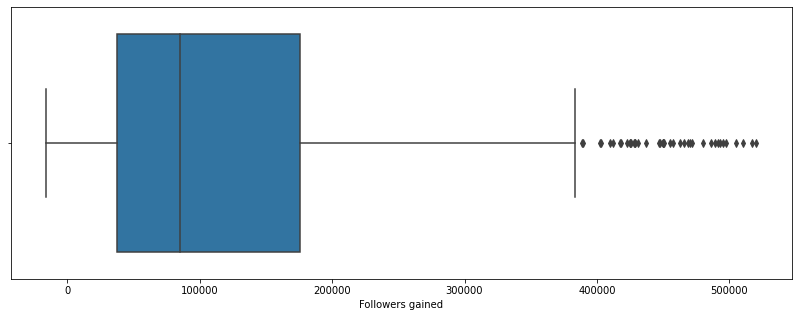

In [15]:
figure, ax = plt.subplots(figsize=(14,5))
sns.boxplot(ax=ax, x=no_outliers['Followers gained'])

In [16]:
len(no_outliers[no_outliers['Followers gained'] > upper_limit])

0

In [17]:
len(no_outliers[no_outliers['Followers gained'] < lower_limit])

0

In [18]:
no_outliers.isnull().sum()

Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
partnered_true          0
mature_true             0
Chinese                 0
Czech                   0
English                 0
Finnish                 0
French                  0
German                  0
Greek                   0
Hungarian               0
Italian                 0
Japanese                0
Korean                  0
Other                   0
Polish                  0
Portuguese              0
Russian                 0
Slovak                  0
Spanish                 0
Swedish                 0
Thai                    0
Turkish                 0
dtype: int64

In [19]:
no_outliers.to_csv('outliers_removed.csv', index=False)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = no_outliers.drop('Followers gained', axis=1).values
y = no_outliers['Followers gained'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Preprocessing

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Generation

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K
from keras.losses import mean_squared_error as mse

In [27]:
model = Sequential()

# FIRST DENSE LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SECOND DENSE LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# THIRD DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# FOURTH DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# FIFTH DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SIXTH DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SEVENTH DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# EIGHTH DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# OUTPUT LAYER
model.add(Dense(1))

# COMPILE MODEL
def rmse(y_true, y_pred):
    return K.sqrt(mse(y_true, y_pred))

model.compile(optimizer='adam', loss=rmse)

In [28]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), batch_size=32, epochs=300)

Epoch 1/300
20/20 [==============================] - 2s 17ms/step - loss: 126981.5625 - val_loss: 121840.7422
Epoch 2/300
20/20 [==============================] - 0s 9ms/step - loss: 118940.5078 - val_loss: 84837.1641
Epoch 3/300
20/20 [==============================] - 0s 9ms/step - loss: 91245.5469 - val_loss: 83224.6484
Epoch 4/300
20/20 [==============================] - 0s 9ms/step - loss: 83023.9141 - val_loss: 81527.5234
Epoch 5/300
20/20 [==============================] - 0s 10ms/step - loss: 84041.6250 - val_loss: 76217.8906
Epoch 6/300
20/20 [==============================] - 0s 10ms/step - loss: 80377.0781 - val_loss: 73271.2109
Epoch 7/300
20/20 [==============================] - 0s 9ms/step - loss: 76666.7969 - val_loss: 74585.8281
Epoch 8/300
20/20 [==============================] - 0s 10ms/step - loss: 74513.2031 - val_loss: 69974.7109
Epoch 9/300
20/20 [==============================] - 0s 10ms/step - loss: 73545.2344 - val_loss: 75017.8984
Epoch 10/300
20/20 [=========

Epoch 77/300
20/20 [==============================] - 0s 8ms/step - loss: 70690.0312 - val_loss: 61717.9766
Epoch 78/300
20/20 [==============================] - 0s 8ms/step - loss: 68011.6094 - val_loss: 61048.4102
Epoch 79/300
20/20 [==============================] - 0s 8ms/step - loss: 70267.1797 - val_loss: 60461.1562
Epoch 80/300
20/20 [==============================] - 0s 8ms/step - loss: 68560.4844 - val_loss: 65813.7109
Epoch 81/300
20/20 [==============================] - 0s 8ms/step - loss: 71536.6484 - val_loss: 60527.9375
Epoch 82/300
20/20 [==============================] - 0s 8ms/step - loss: 68906.6484 - val_loss: 60549.7852
Epoch 83/300
20/20 [==============================] - 0s 8ms/step - loss: 68928.6172 - val_loss: 59721.4375
Epoch 84/300
20/20 [==============================] - 0s 8ms/step - loss: 71167.7031 - val_loss: 62295.1211
Epoch 85/300
20/20 [==============================] - 0s 8ms/step - loss: 70087.4766 - val_loss: 60136.6445
Epoch 86/300
20/20 [========

20/20 [==============================] - 0s 8ms/step - loss: 67045.2109 - val_loss: 57335.8320
Epoch 153/300
20/20 [==============================] - 0s 8ms/step - loss: 62696.7539 - val_loss: 56687.5586
Epoch 154/300
20/20 [==============================] - 0s 9ms/step - loss: 65190.5859 - val_loss: 56441.0078
Epoch 155/300
20/20 [==============================] - 0s 8ms/step - loss: 66084.2422 - val_loss: 57323.3828
Epoch 156/300
20/20 [==============================] - 0s 10ms/step - loss: 66290.7656 - val_loss: 57387.4766
Epoch 157/300
20/20 [==============================] - 0s 8ms/step - loss: 66501.6875 - val_loss: 57611.6797
Epoch 158/300
20/20 [==============================] - 0s 8ms/step - loss: 65698.3281 - val_loss: 58068.9609
Epoch 159/300
20/20 [==============================] - 0s 8ms/step - loss: 65100.4961 - val_loss: 57687.5781
Epoch 160/300
20/20 [==============================] - 0s 8ms/step - loss: 64746.1367 - val_loss: 58802.9102
Epoch 161/300
20/20 [===========

Epoch 227/300
20/20 [==============================] - 0s 10ms/step - loss: 61846.9375 - val_loss: 58369.9336
Epoch 228/300
20/20 [==============================] - 0s 10ms/step - loss: 64097.9102 - val_loss: 57464.8516
Epoch 229/300
20/20 [==============================] - 0s 10ms/step - loss: 63376.5078 - val_loss: 57277.2891
Epoch 230/300
20/20 [==============================] - 0s 10ms/step - loss: 60964.6484 - val_loss: 58749.9141
Epoch 231/300
20/20 [==============================] - 0s 10ms/step - loss: 63536.1016 - val_loss: 57032.8516
Epoch 232/300
20/20 [==============================] - 0s 10ms/step - loss: 64048.7539 - val_loss: 56847.0156
Epoch 233/300
20/20 [==============================] - 0s 10ms/step - loss: 64670.7695 - val_loss: 57368.8125
Epoch 234/300
20/20 [==============================] - 0s 10ms/step - loss: 64198.2539 - val_loss: 57724.3477
Epoch 235/300
20/20 [==============================] - 0s 10ms/step - loss: 64290.3477 - val_loss: 57410.8477
Epoch 236/

### Model Predictions & Evaluation

In [29]:
dnn_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

Mean Squared Error

In [31]:
mean_squared_error(y_test, dnn_pred)

7418804568.113516

Root Mean Squared Error

In [32]:
np.sqrt(mean_squared_error(y_test, dnn_pred))

86132.48265383691

Explained Variance Score

In [33]:
explained_variance_score(y_test, dnn_pred)

0.4725414673462325

Accuracy

In [34]:
r2_score(y_test, dnn_pred) * 100

45.44008272637245

Conclusion 2: No, removing the outliers did not improved the model's accuracy. Despite using the identical DNN model and training method, explained variance score fell from 0.612 to 0.473; accuracy fell from 60.8 to 45.4; the lower the values are, the model is incapable of making accurate predictions.

Derived Question: Below is the heatmap displaying the correlation between each numerical column and the *Followers gained*. As previously mentioned at the ```1. Twitch Data_DNN``` notebook, *Stream time(minutes)* is negatively correlated with *Followers gained*. If only the positive-highly correlated columns are used to train the model, will it be able to make more accurate predictions?
<br>Continued on ```3. High Correlation_DNN```...

In [39]:
extracted_corr = pd.read_csv('extracted_corr.csv')
extracted_corr.rename(index={0: 'Followers gained'}, inplace=True)
extracted_corr

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.0,0.244297


<AxesSubplot:>

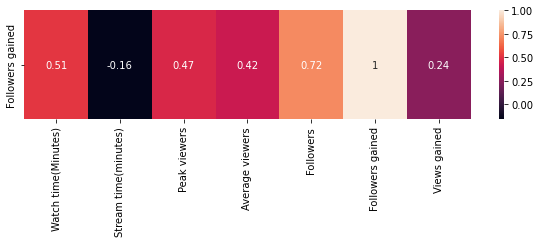

In [41]:
figure, ax = plt.subplots(figsize=(10,2))
sns.heatmap(ax=ax, data=extracted_corr, annot=True)